# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [103]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [104]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [105]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [106]:
df_train.shape

(15223, 52)

In [107]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [108]:
df_test.shape

(14910, 52)

In [109]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [110]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,15213,15214,15215,15216,15217,15218,15219,15220,15221,15222
AGREEMENT_RK,59910150,59910230,59910525,59910803,59911781,59911784,59911832,59912034,59912560,59912659,...,75290347,75290611,75290704,75291177,75291338,75291424,75291888,75291923,75291960,75292242
TARGET,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AGE,49,32,52,39,30,29,35,41,53,43,...,36,31,35,61,39,25,51,22,60,37
SOCSTATUS_WORK_FL,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
SOCSTATUS_PENS_FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
GENDER,1,1,1,1,0,0,0,1,0,1,...,0,1,1,0,1,0,1,1,1,0
CHILD_TOTAL,2,3,4,1,0,0,1,0,2,0,...,0,1,1,0,1,1,2,1,2,2
DEPENDANTS,1,3,0,1,0,0,1,0,0,0,...,0,1,1,0,1,1,0,1,0,0
EDUCATION,Среднее специальное,Среднее,Неполное среднее,Высшее,Среднее,Среднее,Высшее,Среднее,Высшее,Среднее специальное,...,Среднее,Высшее,Среднее специальное,Среднее,Среднее специальное,Среднее,Среднее специальное,Среднее,Среднее,Среднее
MARITAL_STATUS,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Состою в браке,Гражданский брак,Разведен(а),Состою в браке,Состою в браке,Состою в браке,...,Состою в браке,Состою в браке,Состою в браке,Не состоял в браке,Состою в браке,Состою в браке,Состою в браке,Не состоял в браке,Вдовец/Вдова,Состою в браке


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [111]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [112]:
df = df_test.append(df_train).reset_index(drop=True)

In [113]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [115]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Неполное среднее', 'Неоконченное высшее', 'Высшее', 'Ученая степень', 'Среднее специальное', 'Среднее'}


MARITAL_STATUS
{'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Банк/Финансы', 'Торговля', 'Металлургия/Промышленность/Машиностроение', 'Недвижимость', 'Нефтегазовая промышленность', 'Юридические услуги/нотариальные услуги', 'Информационные услуги', 'Сельское хозяйство', 'Другие сферы', 'Управляющая компания', 'Государственная служба', 'Коммунальное хоз-во/Дорожные службы', 'Строительство', 'Информационные технологии', 'Туризм', 'Логистика', 'Ресторанный бизнес/Общественное питание', 'Энергетика', 'Образование', 'ЧОП/Детективная д-ть', 'СМИ/Реклама/PR-агенства', 'Развлечения/Искусство', 'Наука', 'Сборочные производства', 'Подбор персонала', 'Химия/Парфюмерия/Фармацевтика', 'Здравоохранение', 'Транспорт', 'Маркетинг', 'Салоны красоты и здоровья', 'Страхование'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [116]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Есть, df.info() показывает пропуски в данных по полям GEN_INDUSTRY (27420 non-null object вместо 30133), GEN_TITLE (27420 non-null object вместо 30133), ORG_TP_STATE (27420 non-null object вместо 30133), ORG_TP_FCAPITAL (27420 non-null object вместо 30133), JOB_DIR (27420 non-null object вместо 30133), TP_PROVINCE (29543 non-null object вместо 30133), WORK_TIME (27420 non-null float64 вместо 30133), PREVIOUS_CARD_NUM_UTILIZED (600 non-null float64 вместо 30133).

In [117]:
# считаем количество пустых ячеек
df.isnull().sum()

AGREEMENT_RK                      0
TARGET                            0
AGE                               0
SOCSTATUS_WORK_FL                 0
SOCSTATUS_PENS_FL                 0
GENDER                            0
CHILD_TOTAL                       0
DEPENDANTS                        0
EDUCATION                         0
MARITAL_STATUS                    0
GEN_INDUSTRY                   2713
GEN_TITLE                      2713
ORG_TP_STATE                   2713
ORG_TP_FCAPITAL                2708
JOB_DIR                        2713
FAMILY_INCOME                     0
PERSONAL_INCOME                   0
REG_ADDRESS_PROVINCE              0
FACT_ADDRESS_PROVINCE             0
POSTAL_ADDRESS_PROVINCE           0
TP_PROVINCE                     590
REGION_NM                         2
REG_FACT_FL                       0
FACT_POST_FL                      0
REG_POST_FL                       0
REG_FACT_POST_FL                  0
REG_FACT_POST_TP_FL               0
FL_PRESENCE_FL              

Вариант 1 - заменить пропуски на "0" либо на нейтральную фразу, например,"Нет данных", либо на медиану.
Вариант 2 - "отбросить" данные, в которых есть нулевые значения (что мы и сделаем в соответствующей фукнции в одном из последующих шагов).

In [118]:
df.fillna("Нет данных").T

,0,1,2,3,4,5,6,7,8,9,...,30123,30124,30125,30126,30127,30128,30129,30130,30131,30132
AGREEMENT_RK,59909969,59910420,59911223,59911322,59911438,59911769,59912044,59912382,59912422,59912485,...,75290347,75290611,75290704,75291177,75291338,75291424,75291888,75291923,75291960,75292242
TARGET,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
AGE,30,48,35,22,27,44,57,33,53,33,...,36,31,35,61,39,25,51,22,60,37
SOCSTATUS_WORK_FL,1,0,1,1,1,0,1,1,0,1,...,1,1,1,1,1,1,1,1,0,1
SOCSTATUS_PENS_FL,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
GENDER,1,1,0,0,1,0,1,1,1,0,...,0,1,1,0,1,0,1,1,1,0
CHILD_TOTAL,1,0,1,0,2,2,0,2,2,1,...,0,1,1,0,1,1,2,1,2,2
DEPENDANTS,1,0,0,0,2,2,0,2,0,0,...,0,1,1,0,1,1,0,1,0,0
EDUCATION,Среднее специальное,Среднее,Среднее,Среднее,Высшее,Среднее специальное,Среднее,Среднее специальное,Среднее специальное,Неполное среднее,...,Среднее,Высшее,Среднее специальное,Среднее,Среднее специальное,Среднее,Среднее специальное,Среднее,Среднее,Среднее
MARITAL_STATUS,Не состоял в браке,Состою в браке,Не состоял в браке,Не состоял в браке,Состою в браке,Состою в браке,Не состоял в браке,Разведен(а),Состою в браке,Состою в браке,...,Состою в браке,Состою в браке,Состою в браке,Не состоял в браке,Состою в браке,Состою в браке,Состою в браке,Не состоял в браке,Вдовец/Вдова,Состою в браке


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

Категориальные признаки отличаются тем, что их значения определяют принадлежность к какой-то категории. Например, пол, страна проживания, номер группы, категория товаров и т.п. - для обработки они хранят числа (0, 1, 2..) вместо привычных значений для данной категории.

Как мы видим в df_descr, следующие данные были созданы по принципу категориальности - они хранят числа, которые подразумевают конкретное заданное значение (сортировка по алфавиту):
AUTO_RUS_FL
COT_PRESENCE_FL
DL_DOCUMENT_FL
FACT_PHONE_FL
FACT_POST_FL
FL_PRESENCE_FL
GAR_PRESENCE_FL
GEN_PHONE_FL
GENDER
GPF_DOCUMENT_FL
HS_PRESENCE_FL
LAND_PRESENCE_FL
REG_FACT_FL
REG_FACT_POST_FL
REG_PHONE_FL
REG_POST_FL
SOCSTATUS_PENS_FL
SOCSTATUS_WORK_FL

При этом есть данные, которые по своей сути могут стать категориальными признаками, но по форме в данный момент таковыми не являются. Для того, чтобы они стали категориальными, их необходимо преобразовать. Речь идет о данных, которые сохранены как "object":
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_PROVINCE         30133 non-null object
POSTAL_ADDRESS_PROVINCE       30133 non-null object
TP_PROVINCE                   29543 non-null object
REGION_NM                     30131 non-null object
CREDIT                        30133 non-null object
FST_PAYMENT                   30133 non-null object
LOAN_AVG_DLQ_AMT              30133 non-null object
LOAN_MAX_DLQ_AMT              30133 non-null object
sample                        30133 non-null object

Что с ними делать? Использовать для анализа. Например, выводить отчеты в разрезе категорий.

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0.5,1,'Распределение клиентов по полу')

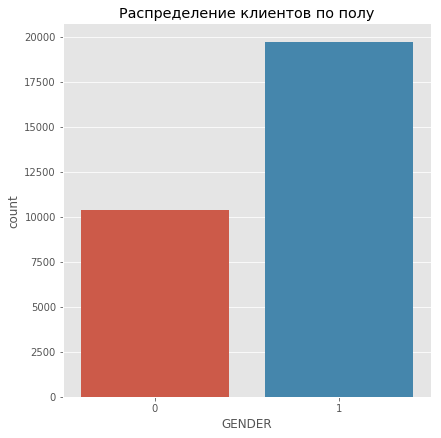

In [121]:
sns.factorplot('GENDER',data=df,kind='count',size=6)
plt.title("Распределение клиентов по полу")

Text(0.5,1,'Распределение клиентов по социальному статусу клиента относительно работы (1 - работает, 0 - не работает)')

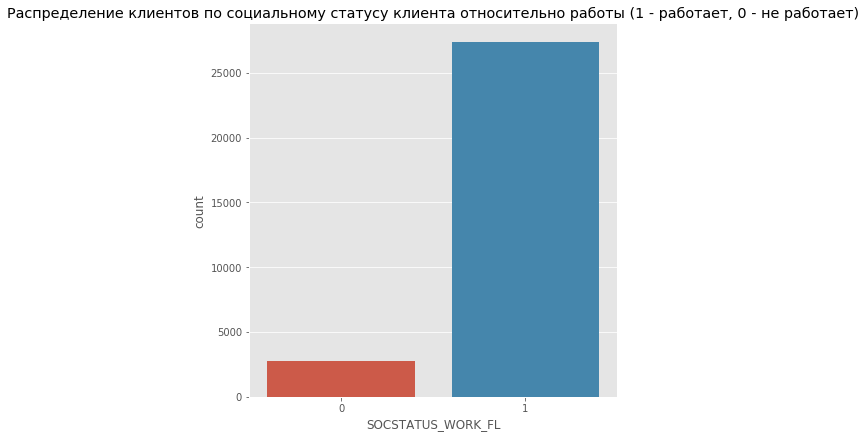

In [122]:
sns.factorplot('SOCSTATUS_WORK_FL',data=df,kind='count',size=6)
plt.title("Распределение клиентов по социальному статусу клиента относительно работы (1 - работает, 0 - не работает)")

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [188]:
def preproc_data(df_input):
    
    from sklearn import preprocessing
    
    df_output = df_input.copy()
    
    df_output = df_output.drop('AGREEMENT_RK', 1)
    # df_output = df_output.drop('PREVIOUS_CARD_NUM_UTILIZED', 1)
    
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    # отбрасываем столбцы, в которых не заполнены все необходимые ячейки
    df_output = df_output[~df_output['WORK_TIME'].isnull()]
    df_output = df_output[~df_output['GEN_INDUSTRY'].isnull()]
    df_output = df_output[~df_output['GEN_TITLE'].isnull()]
    df_output = df_output[~df_output['ORG_TP_STATE'].isnull()]
    df_output = df_output[~df_output['ORG_TP_FCAPITAL'].isnull()]
    df_output = df_output[~df_output['ORG_TP_STATE'].isnull()]
    df_output = df_output[~df_output['TP_PROVINCE'].isnull()]
    df_output = df_output[~df_output['JOB_DIR'].isnull()]
    
    # в остальных пустых ячейках недостающую информацию заполняем нулями
    df_output.fillna(0, inplace=True)
    
    # кодируем категориальные признаки
    label_encoder = preprocessing.LabelEncoder()
    categorical_columns = df_output.columns[df_output.dtypes == 'object']
    for column in categorical_columns:
          df_output[column] = label_encoder.fit_transform(df_output[column].astype(str))
            
    return df_output

In [189]:
df_preproc = df.pipe(preproc_data)

df_preproc

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,0,30,1,0,1,1,1,5,2,13,...,1,2,2,8,0,0,0.000000,0.00,0.0,0
2,0,35,1,0,0,1,0,4,2,9,...,1,1,1,1,0,0,0.000000,0.00,0.0,0
3,0,22,1,0,0,0,0,4,2,2,...,1,3,2,9,0,0,0.000000,0.00,0.0,0
4,0,27,1,0,1,2,2,0,4,13,...,1,1,1,5,0,0,0.000000,0.00,0.0,0
6,0,57,1,0,1,0,0,4,2,19,...,1,3,3,14,0,0,0.000000,0.00,0.0,0
7,0,33,1,0,1,2,2,5,3,13,...,1,1,1,5,0,0,0.000000,0.00,0.0,0
9,1,33,1,0,0,1,0,3,4,23,...,1,1,1,6,0,0,0.000000,0.00,0.0,0
10,0,33,1,0,0,1,1,4,4,22,...,1,2,1,9,0,0,0.000000,0.00,0.0,0
11,0,40,1,0,1,1,1,5,4,16,...,1,1,1,5,0,0,0.000000,0.00,0.0,0
13,0,39,1,0,1,2,2,0,3,2,...,1,1,1,8,1,1,806.930000,806.93,0.0,0


In [211]:
# поскольку таблица содержит только цифры, никаких "train" и "test" не осталось - заменил на "0" и "1"
df_test_preproc = df_preproc.query('sample == "0"').drop(['sample'], axis=1)
df_train_preproc = df_preproc.query('sample == "1"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [212]:
y = df_train_preproc['TARGET']
df_train_preproc = df_train_preproc.drop(['TARGET'], axis=1)

y_test = df_test_preproc['TARGET']
df_test_preproc = df_test_preproc.drop(['TARGET'], axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [213]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42)

In [214]:
X_train.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
29151,49,1,0,1,2,0,4,2,24,6,...,0,1,1,1,2,0,0,0.0,0.0,0.0
25650,33,1,0,1,1,1,0,4,17,6,...,0,1,5,4,24,1,1,4400.0,4400.0,0.0
16809,35,1,0,1,2,2,5,4,3,1,...,0,1,1,0,4,0,0,0.0,0.0,0.0
30031,64,1,1,1,2,0,4,0,2,11,...,0,1,2,2,19,0,0,0.0,0.0,0.0
28061,37,1,0,1,2,2,5,4,2,5,...,0,1,1,1,5,0,0,0.0,0.0,0.0


In [215]:
X_test.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
18379,45,1,0,0,1,0,5,4,24,11,...,0,1,1,1,3,0,0,0.0,0.0,0.0
22838,49,1,0,1,2,0,4,2,16,6,...,0,1,1,0,5,0,0,0.0,0.0,0.0
25059,28,1,0,1,0,0,4,4,23,6,...,0,1,3,3,18,0,0,0.0,0.0,0.0
24691,35,1,0,0,1,1,4,4,2,11,...,0,1,2,2,16,0,0,0.0,0.0,0.0
19761,32,1,0,0,0,0,5,4,2,1,...,0,1,1,1,4,0,0,0.0,0.0,0.0


In [216]:
y_train.head()

29151    0
25650    0
16809    0
30031    0
28061    0
Name: TARGET, dtype: int64

In [217]:
y_test.head()

18379    0
22838    0
25059    0
24691    0
19761    0
Name: TARGET, dtype: int64

In [218]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
model_LR = LogisticRegression()                     # инициализируем модель
model_LR.fit(X_train, y_train)                      # обучаем модель на трейн данных и тест данных
predict_LR = model_LR.predict(X_test)                  # делаем предсказание
predict_proba_LR = model_LR.predict_proba(X_test)      # вероятность

print('precision LR', precision_score(y_test, predict_LR))
print('recall LR', recall_score(y_test, predict_LR))
print('accuracy LR', accuracy_score(y_test, predict_LR))


precision LR 0.3333333333333333
recall LR 0.0018281535648994515
accuracy LR 0.8776512614422862


/Users/cheryomukhin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [219]:
model_RF = RandomForestClassifier(n_estimators=1000)
model_RF.fit(X_train, y_train)
predict_RF = model_RF.predict(X_test)
predict_proba_RF = model_RF.predict_proba(X_test)

print('precision RF', precision_score(y_test, predict_RF))
print('recall RF', recall_score(y_test, predict_RF))
print('accuracy RF', accuracy_score(y_test, predict_RF))

precision RF 1.0
recall RF 0.003656307129798903
accuracy RF 0.8783210538066533


In [220]:
model_DT = DecisionTreeClassifier(criterion='entropy', random_state=100)
model_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)
predict_proba_DT = model_DT.predict_proba(X_test)

print('precision DT', precision_score(y_test, predict_DT))
print('recall DT', recall_score(y_test, predict_DT))
print('accuracy DT', accuracy_score(y_test, predict_DT))

precision DT 0.15166666666666667
recall DT 0.1663619744058501
accuracy DT 0.7845501227952668


In [221]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('------ LogisticRegression ------')
print(end='\n',flush=True)

print('precision LR', precision_score(y_test, predict_LR))
print('recall LR', recall_score(y_test, predict_LR))
print('accuracy LR', accuracy_score(y_test, predict_LR))

print(end='\n',flush=True)
print('------ RandomForestClassifier ------')
print(end='\n',flush=True)

print('precision RF', precision_score(y_test, predict_RF))
print('recall RF', recall_score(y_test, predict_RF))
print('accuracy RF', accuracy_score(y_test, predict_RF))

print(end='\n',flush=True)
print('------ DecisionTreeClassifier ------')
print(end='\n',flush=True)

print('precision DT', precision_score(y_test, predict_DT))
print('recall DT', recall_score(y_test, predict_DT))
print('accuracy DT', accuracy_score(y_test, predict_DT))

------ LogisticRegression ------

precision LR 0.3333333333333333
recall LR 0.0018281535648994515
accuracy LR 0.8776512614422862

------ RandomForestClassifier ------

precision RF 1.0
recall RF 0.003656307129798903
accuracy RF 0.8783210538066533

------ DecisionTreeClassifier ------

precision DT 0.15166666666666667
recall DT 0.1663619744058501
accuracy DT 0.7845501227952668


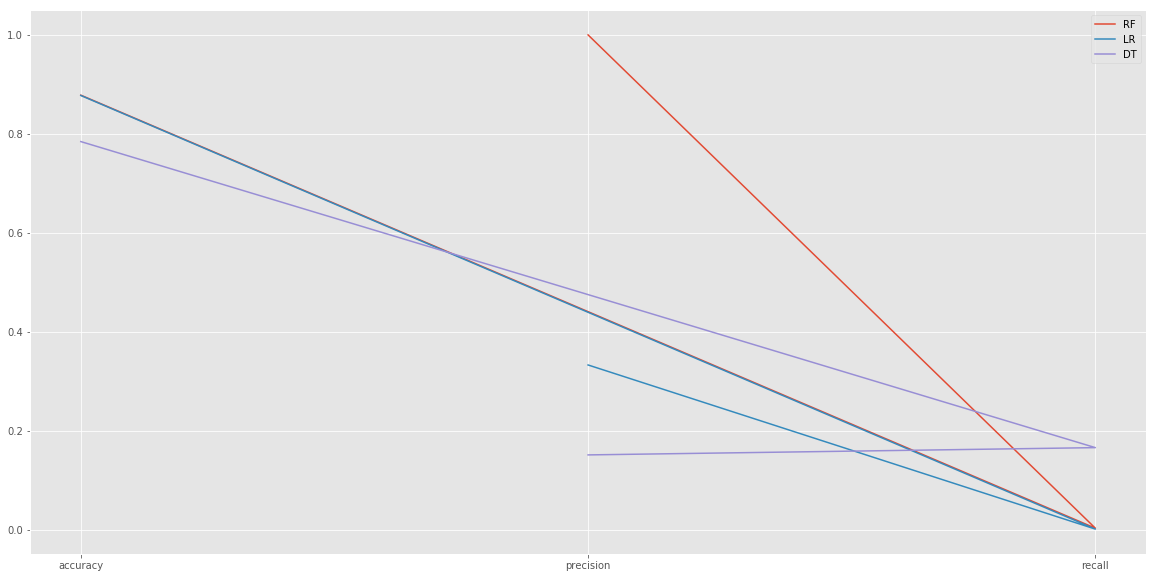

In [222]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
_, ax = plt.subplots(figsize=(20,10))



data_LR_txt = []
data_LR = []
data_LR = [precision_score(y_test, predict_LR),recall_score(y_test, predict_LR),accuracy_score(y_test, predict_LR)]
data_LR_txt = (['precision','recall','accuracy'])

data_RF_txt = []
data_RF = []
data_RF = [precision_score(y_test, predict_RF),recall_score(y_test, predict_RF),accuracy_score(y_test, predict_RF)]
data_RF_txt = (['precision','recall','accuracy'])

data_DT_txt = []
data_DT = []
data_DT = [precision_score(y_test, predict_DT),recall_score(y_test, predict_DT),accuracy_score(y_test, predict_DT)]
data_DT_txt = (['precision','recall','accuracy'])


plt.plot(data_RF_txt,data_RF,label='RF')
plt.plot(data_LR_txt,data_LR,label='LR')
plt.plot(data_DT_txt,data_DT,label='DT')
plt.legend()



(-0.01, 1.01)

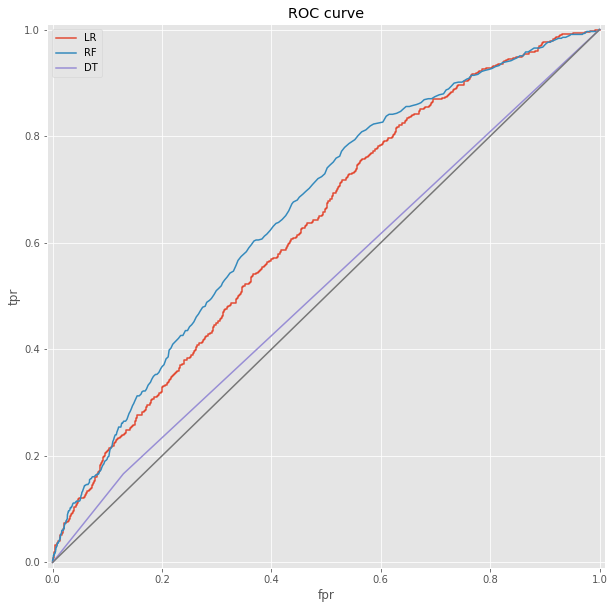

In [223]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
from sklearn.metrics import roc_auc_score, roc_curve

fpr_LR, tpr_LR, thresholds = roc_curve(y_test, predict_proba_LR[:,1]) #вложили реальные Y  и предугаданные
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, predict_proba_RF[:,1]) #вложили реальные Y  и предугаданные
fpr_DT, tpr_DT, thresholds = roc_curve(y_test, predict_proba_DT[:,1]) #вложили реальные Y  и предугаданные
plt.figure(figsize=(10, 10))
plt.plot(fpr_LR, tpr_LR,label='LR')
plt.plot(fpr_RF, tpr_RF,label='RF')
plt.plot(fpr_DT, tpr_DT,label='DT')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [229]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
RF = RandomForestClassifier()

print('------ RandomForestClassifier ------')

np.average( cross_val_score(
    RF,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10 
),axis=0)

------ RandomForestClassifier ------


0.5697064443936142

In [230]:
LR = LogisticRegression()

print('------ LogisticRegression ------')

np.average(cross_val_score(
    LR,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10 
),axis=0)

------ LogisticRegression ------


0.6301226482556139

In [231]:
DT = DecisionTreeClassifier()

print('------ DecisionTreeClassifier ------')

np.average( cross_val_score(
    DT,
    df_train_preproc,
    y,
    scoring='roc_auc',
    cv=10 
),axis=0)

------ DecisionTreeClassifier ------


0.5253210211910153

In [233]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# predict = 
## Your Code Here

model_LR = LogisticRegression()                     # инициализируем модель
model_LR.fit(X_train, y_train)                      # обучаем модель на трейн данных и тест данных
predict_LR = model_LR.predict(X_test)                  # делаем предсказание
predict_proba_LR = model_LR.predict_proba(X_test)      # вероятность

roc_auc_score(y_test, predict_proba_LR[:,1])

/Users/cheryomukhin/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


0.6318209376586615

In [248]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here
roc_auc = cross_val_score(
    LR,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=100 
)


print(roc_auc)

[0.4625     0.67083333 0.53333333 0.81666667 0.66666667 0.68333333
 0.6625     0.575      0.67916667 0.67916667 0.4875     0.60416667
 0.48333333 0.30416667 0.7        0.70833333 0.74583333 0.8125
 0.6375     0.7875     0.63333333 0.56666667 0.69583333 0.62083333
 0.83333333 0.86666667 0.54166667 0.65416667 0.6        0.64583333
 0.59166667 0.66666667 0.73076923 0.47435897 0.68376068 0.50854701
 0.5042735  0.4957265  0.55982906 0.6965812  0.76923077 0.71367521
 0.59401709 0.57264957 0.52991453 0.45726496 0.52564103 0.76923077
 0.57435897 0.81025641 0.66153846 0.7025641  0.66153846 0.65641026
 0.61538462 0.48205128 0.73846154 0.78974359 0.76923077 0.65641026
 0.30769231 0.56923077 0.48205128 0.66153846 0.53333333 0.73333333
 0.47179487 0.42051282 0.74871795 0.64615385 0.55384615 0.31794872
 0.58974359 0.82051282 0.70769231 0.48717949 0.47179487 0.6
 0.7025641  0.60512821 0.79487179 0.85128205 0.53846154 0.46666667
 0.76923077 0.54871795 0.73846154 0.74358974 0.73846154 0.70769231
 0.548

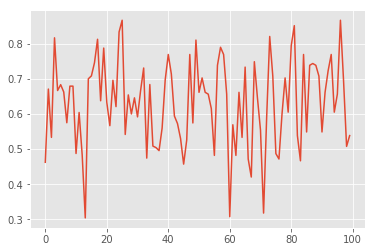

In [249]:
plt.plot(range(0,100), roc_auc)

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [176]:
### И далее ;)

In [250]:
model_RF = RandomForestClassifier()                     # инициализируем модель
model_RF.fit(X_train, y_train)                      # обучаем модель на трейн данных и тест данных
predict_RF = model_RF.predict(X_test)                  # делаем предсказание
predict_proba_RF = model_RF.predict_proba(X_test)      # вероятность

roc_auc_score(y_test, predict_proba_RF[:,1])

0.5831974926585592

In [251]:
roc_auc = cross_val_score(
    RF,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=100 
)


print(roc_auc)

[0.56458333 0.71458333 0.625      0.67083333 0.42291667 0.43125
 0.73125    0.75       0.61458333 0.60625    0.55416667 0.43125
 0.63333333 0.4875     0.77916667 0.66875    0.50416667 0.60208333
 0.48125    0.46875    0.24791667 0.52708333 0.5        0.60833333
 0.53125    0.68333333 0.41875    0.69166667 0.64166667 0.45416667
 0.46458333 0.57708333 0.63675214 0.73717949 0.67094017 0.76282051
 0.61324786 0.62179487 0.59615385 0.69444444 0.47649573 0.43589744
 0.74145299 0.41880342 0.69230769 0.61324786 0.71581197 0.47948718
 0.71538462 0.60769231 0.33076923 0.4        0.52307692 0.44871795
 0.61282051 0.49230769 0.77179487 0.54102564 0.74615385 0.55384615
 0.46410256 0.31794872 0.33589744 0.18205128 0.60512821 0.49230769
 0.41794872 0.56923077 0.4        0.52564103 0.52307692 0.66666667
 0.32820513 0.58717949 0.51025641 0.53846154 0.74102564 0.54615385
 0.62564103 0.62564103 0.83333333 0.75384615 0.29487179 0.81794872
 0.67692308 0.61794872 0.48717949 0.71282051 0.77435897 0.59230769
 

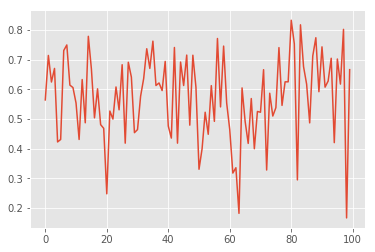

In [252]:
plt.plot(range(0,100), roc_auc)

In [245]:
model_DT = DecisionTreeClassifier()                     # инициализируем модель
model_DT.fit(X_train, y_train)                      # обучаем модель на трейн данных и тест данных
predict_DT = model_DT.predict(X_test)                  # делаем предсказание
predict_proba_DT = model_DT.predict_proba(X_test)      # вероятность

roc_auc_score(y_test, predict_proba_DT[:,1])

0.5269052875110888

In [253]:
roc_auc = cross_val_score(
    DT,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=100 
)


print(roc_auc)

[0.50833333 0.4375     0.4125     0.77083333 0.725      0.4125
 0.59166667 0.47083333 0.50833333 0.56666667 0.425      0.45
 0.4        0.50833333 0.52083333 0.375      0.64166667 0.54583333
 0.62916667 0.52083333 0.61666667 0.50833333 0.54583333 0.44583333
 0.425      0.45833333 0.85416667 0.61666667 0.475      0.49583333
 0.7        0.6625     0.44871795 0.44871795 0.44871795 0.49358974
 0.55128205 0.3974359  0.55769231 0.44871795 0.51923077 0.58974359
 0.54487179 0.50641026 0.44871795 0.6025641  0.68589744 0.73589744
 0.63589744 0.62307692 0.38461538 0.47435897 0.52307692 0.46153846
 0.52307692 0.56153846 0.46153846 0.51025641 0.48461538 0.54871795
 0.43589744 0.64871795 0.48461538 0.52051282 0.41025641 0.47435897
 0.44871795 0.67435897 0.46153846 0.63589744 0.46153846 0.51025641
 0.46153846 0.62307692 0.83589744 0.42307692 0.4974359  0.66153846
 0.3974359  0.47435897 0.46153846 0.53589744 0.47179487 0.41025641
 0.64871795 0.62307692 0.43589744 0.3974359  0.64871795 0.52307692
 0.52

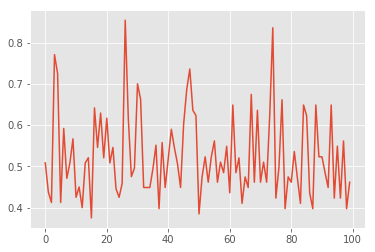

In [254]:
plt.plot(range(0,100), roc_auc)